<a href="https://colab.research.google.com/github/JamileSantos/Modelos_Ciencia_de_Dados/blob/master/Desafio_AIOps_Globo_Jamile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Desafio AIOps Globo

A Globo decidiu lançar um sistema de compras dentro de seu aplicativo de streaming Globoplay. Os usuários assinam o Globoplay e podem assistir diversos conteúdos de vídeos: filmes, séries, novelas, jornais etc. Enquanto o usuário assiste o conteúdo, ele pode acessar um menu no aplicativo ou no website que irá mostrar produtos relacionados ao conteúdo que está sendo assistido, exemplo: O personagem de uma novela usa uma roupa de uma marca determinada, o usuário poderá comprar essa mesma roupa da mesma marca.

Vamos supor que esse sistema já esteja sendo usado em uma pequena quantidade de usuários há alguns anos e você foi contratado para analisar se a Globo deverá focar seus esforços em seu aplicativo móvel ou em seu site, de forma a dar mais atenção ao que gera mais lucro. 

Com base nisso seguem alguns questionamentos:
1. O tempo como membro é importante? 
2. Como você interpreta os coeficientes gerados? 
3. Onde a Globo deve investir futuramente seus recursos e esforços: no app ou no site? 
4. Na sua visão, os dados mostram algum insight importante que a Globo deva levar em consideração para este projeto?

In [175]:
# GloboplayUsers.csv
# Importando as bibliotecas 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Importando a base de dados 

df = pd.read_csv('/content/drive/MyDrive/Dataset/GloboplayUsers.csv', delimiter=',')

### Analise exploratória dos dados



In [164]:
# Verificando o Tamanho da Amostra
df.shape

(500, 4)

In [165]:
#Verificando as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time on App           500 non-null    float64
 1   Time on Website       500 non-null    float64
 2   Length of Membership  500 non-null    float64
 3   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [166]:
#Verificando a Presença de Nulos
df.isna().sum()

Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Sobre a análise estatística dos dados iniciais:

*   A **média** de *Tempo médio gasto no aplicativo Globoplay* em horas/semana é de $\color{red}{12.052488}$, para a média de *Tempo médio gasto no site do Globoplay* em horas/semana é de $\color{red}{37.060445}$, para a média de *Há quantos anos o cliente é membro* do Globoplay é de $\color{red}{3.533462}$, para a média do *Quanto o usuário gastou em média durante um ano de teste* da funcionalidade em reais $\color{red}{499.314038}$
*   **Desvio Padrão**: na análise inicial, os três primeiros campos indicam o quanto o conjunto de dados é uniforme (quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados), portanto as variáveis *Time on App* = $\color{red}{0.994216}$,	*Time on Website* = $\color{red}{1.010489}$,	*Lenght of Membership* = $\color{red}{0.999278}$, e apenas na variável *Yearly Amount Spent* =	$\color{red}{79.314782}$ possue um  grau de dispersão maior no conjunto de dados




In [167]:
df.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000
mean,12.052488,37.060445,3.533462,499.314038
std,0.994216,1.010489,0.999278,79.314782
min,8.508152,33.913847,0.269901,256.670582
25%,11.388153,36.349257,2.930450,445.038277
50%,11.983231,37.069367,3.533975,498.887875
75%,12.753850,37.716432,4.126502,549.313828
max,15.126994,40.005182,6.922689,765.518462


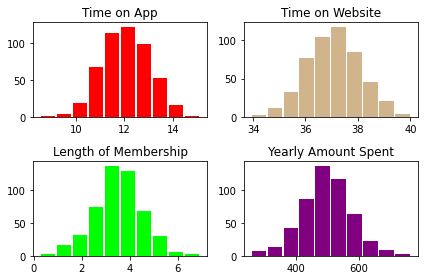

In [168]:
#Visualização gráfica dos Dados
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.hist(df["Time on App"], 10, stacked=True, color ='red', rwidth=0.9)
ax0.set_title('Time on App')

ax1.hist(df["Time on Website"], 10, stacked=True, color ='tan', rwidth=0.9)
ax1.set_title('Time on Website')

ax2.hist(df["Length of Membership"], 10, stacked=True, color ='lime',rwidth=0.9)
ax2.set_title('Length of Membership')

ax3.hist(df["Yearly Amount Spent"], 10, stacked=True, color ='purple', rwidth=0.9)
ax3.set_title('Yearly Amount Spent')

fig.tight_layout()
plt.show()


### Motivação sobre a escolha da Implementação da solução em Python e de suas boas práticas

> A segmentação do público-alvo de uma campanha é essencial para sua efetividade. Para  fazer isso, é preciso estudar os dados de comportamento do consumidor ou potencial cliente da marca e separá-los em clusters, ou seja, grupos. A clusterização é a categorização das informações sobre o consumidor a fim de gerar segmentações relevantes para as campanhas. Uma das grandes vantagens da clusterização é sua flexibilidade. Dado o conjunto de dados apresentado, eu poderia usar o modelo k-means onde eu mediria a incerteza na atribuição de cluster comparando as distâncias de cada ponto a todos os centros de cluster, em vez de se concentrar apenas no mais próximo. Mas para esse conjunto, eu não tenho informações dos dados nem suas relações, entçao para isso eu escolhi a abordagem GMM, onde podemos calcular a probabilidade de associação de um determinado ponto de dados pertencer a certo numero de clusters. E se cálculos retornarem um valor de alta probabilidade para este ponto de dados no cluster, podemos supor que todos os pontos de dados pertencentes a este cluster têm o mesmo valor de destino que este ponto de dados. Com isso, podemos rotular todos os pontos de dados não rotulados deste cluster (dado que os clusters estão fortemente agrupados).

### Gaussian Mixture Models

Escolhi o ***Modelo de Mistura Gaussiana(GMM)*** pois ele tenta encontrar uma mistura de distribuições de probabilidade gaussianas multidimensionais que melhor modelem qualquer conjunto de dados. **O algoritmo GMM é um algoritmo de aprendizado não-supervisionado**, pois não conhecemos nenhuma relação entre as variáveis. Além disso, o GMM é categorizado nos algoritmos de agrupamento, pois pode ser usado para encontrar agrupamentos nos dados revelando a probabilidade de relação entre elas.

Ou seja, ele tenta encontrar alguma distribuição gaussiana que pode ser usada para descrever a forma do nosso conjunto de dados. Assume-se que os pontos de dados vêm de distribuições gaussianas multidimensionais que podem ter parâmetros variados de covariância, média e densidade. Esse modelo é familiar com as Distribuições Gaussianas (ou a Distribuição Normal) que possuem uma curva em forma de sino, com os pontos de dados distribuídos simetricamente em torno do valor médio.


1.   **Definição**

Os modelos de mistura gaussiana funcionam com base em um algoritmo chamado **Expectation-Maximization(EM)**. Quando dado o número de clusters para um modelo de mistura gaussiana, o algoritmo EM tenta descobrir os parâmetros dessas distribuições gaussianas em duas etapas básicas.

>1. O *E-step* faz uma estimativa dos parâmetros com base nos dados disponíveis. Os pontos de dados são atribuídos a um cluster gaussiano e as probabilidades são calculadas de que eles pertencem a esse cluster.
2. O *M-step* atualiza os parâmetros do cluster com base nos cálculos da etapa *E-step*. A média, a covariância e a densidade são calculadas para clusters com base nos pontos de dados.

O processo é repetido com os valores calculados continuando a ser atualizados até que a convergência seja alcançada. Esse processo é familiar com o K-Means,  onde o fluxo semelhante ao de fazer um palpite, calcular valores e reajustar até a convergência.


2. **Bibliografia**

1. VanderPlas,J. (2017). Python Data Science Handbook. Sebastopol: O'Reilly, pp.465
2. Mitchel,T. (1997). Machine Learning. McGraw-Hill: New York, pp.191
3. Bishop,P. (2006). Pattern Recognition and Machine Learning. Berlin, Heidelberg: Springer, pp.430

In [177]:
from sklearn.mixture import GaussianMixture

# Training gaussian mixture model
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=10)
gmm.fit(df) #Estimativa dos parâmetros do modelo com o algoritmo EM.

# Matriz de Probabilidades de Pertencimento
# o método predict_proba retorna uma matriz de tamanho [n_samples, n_clusters] que mede a probabilidade de qualquer ponto pertencer a um determinado cluster
probs = gmm.predict_proba(df)
probs

array([[0.22251478, 0.69818489, 0.07930033],
       [0.06604956, 0.00407035, 0.92988009],
       [0.75464224, 0.02754747, 0.21781029],
       ...,
       [0.76780964, 0.08930377, 0.14288659],
       [0.52479915, 0.10022152, 0.37497933],
       [0.69255474, 0.21560897, 0.09183629]])

In [178]:
# print the converged log-likelihood value
print(gmm.lower_bound_)
 
# print the number of iterations needed
# for the log-likelihood value to converge
print(gmm.n_iter_)

-8.96130395712907
10


**Média e Covariancia gerada dos Dados**

1. Média


> **Cluster 0**: em média, os usuários que o compõem não estão nos limites inferiores e superiores das variáveis, possuindo um maior $\color{green}{⇑}$ Tempo Hora/Semana no App  e como
$\color{green}{⇑}$ Como membro do GloboPlay ***comparado aos usuários do Cluster 0***, são os usuários que passam menos $\color{red}{\downarrow}$ Tempo Hora/Semana no Website, porém possuem uma proximidade com os $\color{red}{\downarrow}$ Gastos por Ano em média durante o teste da funcionalidade em reais *comparado aos usuários do Cluster 1*.

> **Cluster 1**: em média, os usuários que o compõem passam mais $\color{green}{⇑}$ Tempo Hora/Semana no App e como
$\color{green}{⇑}$ Como membro do GloboPlay  , porém passam menos $\color{red}{\downarrow}$ Tempo Hora/Semana no Website, e possuem o maior $\color{green}{⇑}$ Gastos por Ano em média durante o teste da funcionalidade em reais.  


> **Cluster 2**: em média,  os usuários que o compõem passam mais $\color{green}{⇑}$ Tempo Hora/Semana no Website mas, menos $\color{red}{\downarrow}$ Tempo Hora/Semana no App e menos tempo $\color{red}{\downarrow}$ Como membro do GloboPlay, e como consequência possuem menos $\color{red}{\downarrow}$ Gastos por Ano em média durante o teste da funcionalidade em reais.





\begin{array}{c|c|c}
\text{Cluster} & \text{Time on  App} & \text{Time on Website} & \text{Length of Membership} & \text{Yearly Amount Spent} \\ \hline
0 & 12.08130533 & \color{red}{36.96097973} &  3.6761463 & 506.73935437\\
1 & \color{green}{12.69299491} & 37.04594925 &  \color{green}{4.22133625} & \color{green}{582.98572125}\\
2 & \color{red}{11.52446672} & \color{green}{37.21939583} &  \color{red}{2.80016675} & \color{red}{424.89077093}
\end{array}

2. Covariância



In [179]:
print('-- Media --')
print(gmm.means_,'\n')
print('--- Covariância ---')
print(gmm.covariances_,'\n')

-- Media --
[[ 12.08130533  36.96097973   3.6761463  506.73935437]
 [ 12.69299491  37.04594925   4.22133625 582.98572125]
 [ 11.52446672  37.21939583   2.80016675 424.89077093]] 

--- Covariância ---
[[[ 7.21490421e-01 -8.52591928e-03 -2.39231186e-01  7.60064114e+00]
  [-8.52591928e-03  8.43800692e-01  5.44730835e-02  4.59314261e+00]
  [-2.39231186e-01  5.44730835e-02  5.39030104e-01  2.11590188e+01]
  [ 7.60064114e+00  4.59314261e+00  2.11590188e+01  1.91258893e+03]]

 [[ 7.90871782e-01  2.80736098e-01 -5.75678464e-02  2.32647116e+01]
  [ 2.80736098e-01  1.19746368e+00 -2.51617896e-01 -8.05422174e+00]
  [-5.75678464e-02 -2.51617896e-01  8.87182815e-01  4.84506514e+01]
  [ 2.32647116e+01 -8.05422174e+00  4.84506514e+01  4.04210731e+03]]

 [[ 9.38099353e-01  1.63329205e-01 -2.33770178e-01  1.83825155e+01]
  [ 1.63329205e-01  1.10446758e+00  9.91713534e-02  1.24292507e+01]
  [-2.33770178e-01  9.91713534e-02  8.33639525e-01  3.97569798e+01]
  [ 1.83825155e+01  1.24292507e+01  3.97569798e+

Análise da correlação é uma medida que indica a interdependência entre variáveis. Importante lembrar que essa correlação pode ser casual ou não. Essa medida de grau de relação é medida, neste caso,  através do coeficiente de Pearson.


In [180]:
# Matriz de Correlação
print('-- Matriz de Correlação --')
np.corrcoef(df,rowvar=False)

-- Matriz de Correlação --


array([[ 1.        ,  0.08238827,  0.02914256,  0.49932777],
       [ 0.08238827,  1.        , -0.04758182, -0.00264084],
       [ 0.02914256, -0.04758182,  1.        ,  0.80908357],
       [ 0.49932777, -0.00264084,  0.80908357,  1.        ]])

* **Média de Probabilidades**

> Podemos perceber através dessa média é que ao entrar no app Globoplay, o usuário tem aproximadamente ***46% de chance*** de pertencer ao *Cluster 0*, isto é, ao Cluster que  os usuários passam mais $\color{green}{⇑}$ Tempo Hora/Semana no Website, porém menos tempo $\color{red}{\downarrow}$ Como membro do GloboPlay, e como consequência gastam menos $\color{red}{\downarrow}$ Gastos por Ano e passam menos $\color{red}{\downarrow}$ Tempo Hora/Semana no App

In [181]:
# Média de Probabilidades
np.mean(probs, axis=0)

array([0.46015301, 0.23134   , 0.30850698])

In [182]:
#predictions from gmm
labels = gmm.predict(df) #Evaluate the components’ density for each sample.
frame = pd.DataFrame(df)
frame['cluster'] = labels

#Values_Count em relação ao Clusters
frame['cluster'].value_counts()

0    267
2    134
1     99
Name: cluster, dtype: int64

### Respostas ao Questionamentos

1. O tempo como membro é importante?

> Sim, como podemos ver na *análise das médias dos Clusters*, os usúários que possuem mais tempo como membros do GloboPlay, investiram mais em média durante um ano de teste da funcionalidade em reais. Podemos ver na Matriz de Correlação essa relação, aonde as variáveis $\color{yellow}{\textit{Lenght of Membership}}$ e$\color{yellow}{\textit{Yearly Amount Spent}}$ possuem uma correlação muito forte de aproximadamente  $\color{yellow}{0.81}$, possuindo uma relação direta.

2. Como você interpreta os coeficientes gerados?

> Neste modelo GMM utilizado, como explicado anteriormente, conseguimos obter a probabilidade de relação dos usuários com os clusters (grupos), podendo assim realizar a categorização das informações sobre o consumidor a fim de gerar segmentações relevantes para esforços e investimentos. A matriz de Probabilidade e a De Covariância podem ser usadas para analisar o comportamento de clientes e potenciais consumidores do sistema de compras.

3. Onde a Globo deve investir futuramente seus recursos e esforços: no app ou no site?

> De acordo com os dados, na minha opnião a Globo deve **insvestir seus recursos no app** , pois como podemos perceber os usuários que mais gastaram em *média durante um ano de teste da funcionalidade* em reais foram os que mais tinham tempo membro do Globoplay e maior gasto em média durante um ano de teste da funcionalidade em reais. Podemos perceber também que os usuários no **Cluster 0** possuem um Tempo Médio Gasto  no app e gasto em média durante um ano de teste da
funcionalidade em reais bem próximo dos usuários do **Cluster 1** além dos seus gatos,  

4. Na sua visão, os dados mostram algum insight importante que a Globo deva levar em consideração para este projeto?

### Boas práticas de versionamento.

### Visualização Gráficas dos Dados

A análise de correlação vai retornar três possíveis cenários: (1) correlação positiva; (2) correlação negativa; e (3) não há correlação.
Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;
Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;
Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.
Como podemos interpretar os valores que ρ pode assumir?
ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

Na Análise de correlação 

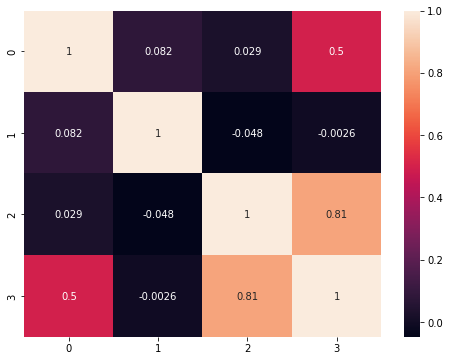

In [152]:
plt.figure(figsize=(8, 6))
sns.heatmap(np.corrcoef(df.iloc[:,:4],rowvar=False), annot=True)
plt.show()

In [153]:
#Separando os Clusters
d0 = df[df['cluster']== 0]
d1 = df[df['cluster']== 1]
d2 = df[df['cluster']== 2]



1.   **Time on App x Length of Membership**



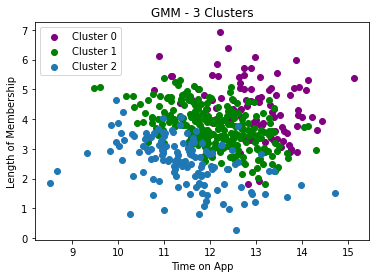

In [154]:
plt.scatter(d0['Time on App'], d0['Length of Membership'], label='Cluster 0', color="purple")
plt.scatter(d1['Time on App'], d1['Length of Membership'], label='Cluster 1', color="green")
plt.scatter(d2['Time on App'], d2['Length of Membership'], label='Cluster 2')
plt.title('GMM - 3 Clusters')
plt.xlabel('Time on App')
plt.ylabel('Length of Membership')
plt.legend()


2.   **Time on Website x Length of Membership**

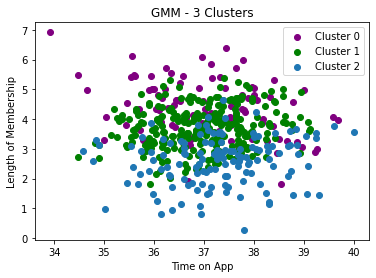

In [155]:
plt.scatter(d0['Time on Website'], d0['Length of Membership'], label='Cluster 0', color="purple")
plt.scatter(d1['Time on Website'], d1['Length of Membership'], label='Cluster 1', color="green")
plt.scatter(d2['Time on Website'], d2['Length of Membership'], label='Cluster 2')
plt.title('GMM - 3 Clusters')
plt.xlabel('Time on App')
plt.ylabel('Length of Membership')
plt.legend()


3.   **Time on App x Yearly Amount Spent**

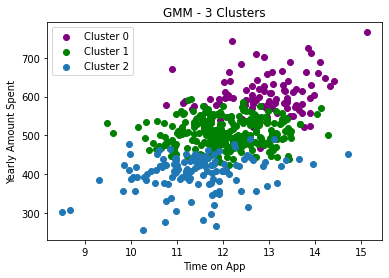

In [156]:
plt.scatter(d0['Time on App'], d0['Yearly Amount Spent'], label='Cluster 0', color="purple")
plt.scatter(d1['Time on App'], d1['Yearly Amount Spent'], label='Cluster 1', color="green")
plt.scatter(d2['Time on App'], d2['Yearly Amount Spent'], label='Cluster 2')
plt.title('GMM - 3 Clusters')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.legend()

4.   **Time on Website x Yearly Amount Spent**

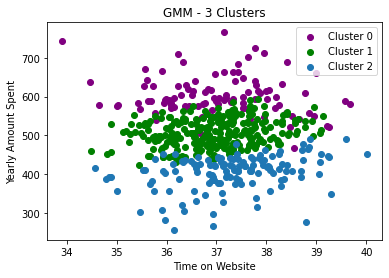

In [157]:
plt.scatter(d0["Time on Website"], d0["Yearly Amount Spent"], label='Cluster 0', color="purple")
plt.scatter(d1["Time on Website"], d1["Yearly Amount Spent"], label='Cluster 1', color="green")
plt.scatter(d2["Time on Website"], d2["Yearly Amount Spent"], label='Cluster 2')
plt.title('GMM - 3 Clusters')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.legend()

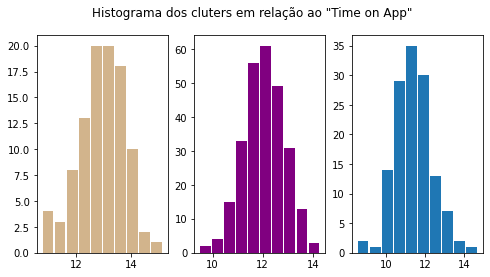

In [158]:
plt.figure(figsize=(8, 4))

plt.subplot(131)
plt.hist(d0["Time on App"], 10, rwidth=0.9, color ='tan')
plt.subplot(132)
plt.hist(d1["Time on App"], 10, rwidth=0.9, color ='purple')
plt.subplot(133)
plt.hist(d2["Time on App"], 10, rwidth=0.9)
plt.suptitle('Histograma dos cluters em relação ao "Time on App"')
plt.show()

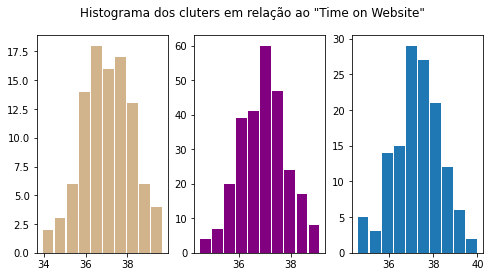

In [159]:
plt.figure(figsize=(8, 4))

plt.subplot(131)
plt.hist(d0["Time on Website"], 10, rwidth=0.9, color ='tan')
plt.subplot(132)
plt.hist(d1["Time on Website"], 10, rwidth=0.9, color ='purple')
plt.subplot(133)
plt.hist(d2["Time on Website"], 10, rwidth=0.9)
plt.suptitle('Histograma dos cluters em relação ao "Time on Website"')
plt.show()

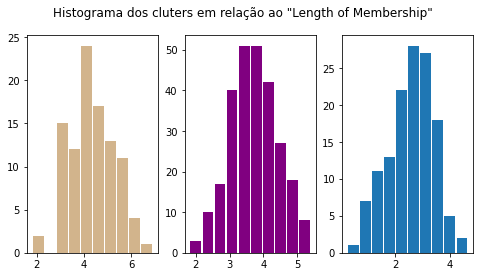

In [160]:
plt.figure(figsize=(8, 4))

plt.subplot(131)
plt.hist(d0["Length of Membership"], 10, rwidth=0.9, color ='tan')
plt.subplot(132)
plt.hist(d1["Length of Membership"], 10, rwidth=0.9, color ='purple')
plt.subplot(133)
plt.hist(d2["Length of Membership"], 10, rwidth=0.9)
plt.suptitle('Histograma dos cluters em relação ao "Length of Membership"')
plt.show()

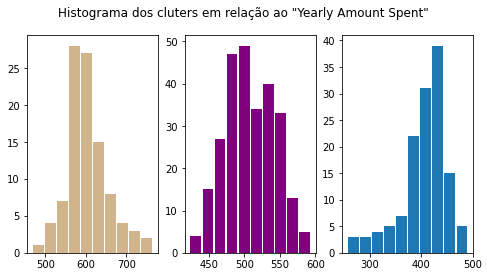

In [161]:
plt.figure(figsize=(8, 4))

plt.subplot(131)
plt.hist(d0["Yearly Amount Spent"], 10, rwidth=0.9, color ='tan')
plt.subplot(132)
plt.hist(d1["Yearly Amount Spent"], 10, rwidth=0.9, color ='purple')
plt.subplot(133)
plt.hist(d2["Yearly Amount Spent"], 10, rwidth=0.9)
plt.suptitle('Histograma dos cluters em relação ao "Yearly Amount Spent"')
plt.show()

### Perguntas bônus

1.   Qual arquitetura você propõe para executar seu algoritmo em uma nuvem pública?
2.   Conteinerização da aplicação

